In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.signal import decimate
from oasis.functions import deconvolve

%load_ext autoreload
%autoreload 2

print('done')

done


/home/dhh/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [21]:
dg_filepath = '/mnt/f/dhh-soltesz-lab/DG-data'
dset        = 'FS202_data.pkl'
full_fpath  = dg_filepath + '/' + dset

data = pickle.load( open( full_fpath, 'rb'), encoding='latin1')

In [22]:
for k in np.sort(list(data.keys())):
    print(data[k]['timestamp'])
    print(len(data[k]['imaging_times']), len(data[k]['LFP_times']))
    print(len(data[k]['mGC']), len(data[k]['abGC']))

2019-04-27-19h02m08s
2776 12113486
218 48
2019-04-27-19h12m22s
2776 12061570
218 48
2019-04-27-19h22m32s
2778 12169981
218 48
2019-04-27-19h32m43s
2777 12187031
218 48
2019-04-27-19h42m59s
2777 12083978
218 48


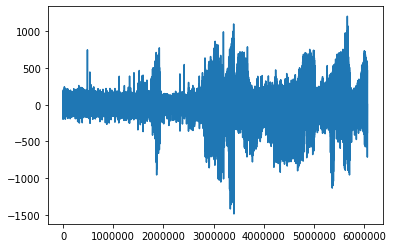

In [23]:
lfp_all = []
lfp_lengths = []
for k in np.sort(list(data.keys())):
        lfp_all.extend(data[k]['LFP'])
        lfp_lengths.append(len(data[k]['LFP']))  
lfp_all = np.asarray(lfp_all, dtype='float32')
lfp_all = decimate(lfp_all, 10)

plt.figure()
plt.plot(lfp_all)
plt.show()

/home/dhh/OASIS/oasis/functions.py:815: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[1:])[0]


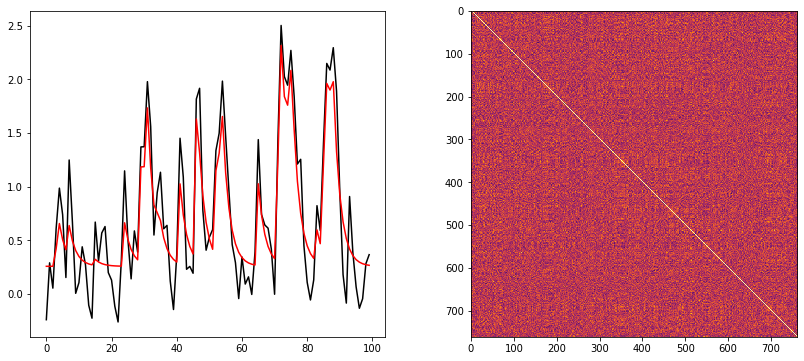

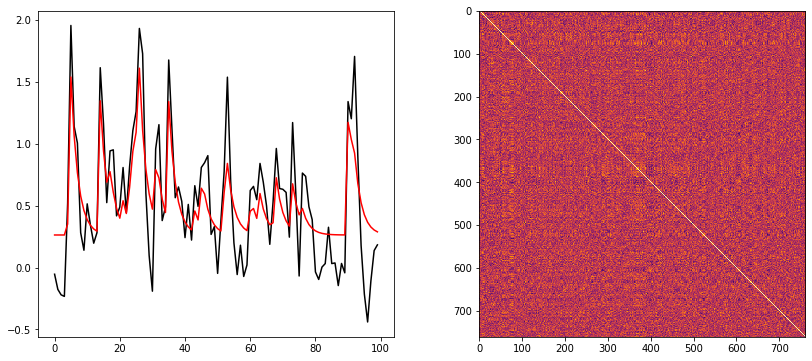

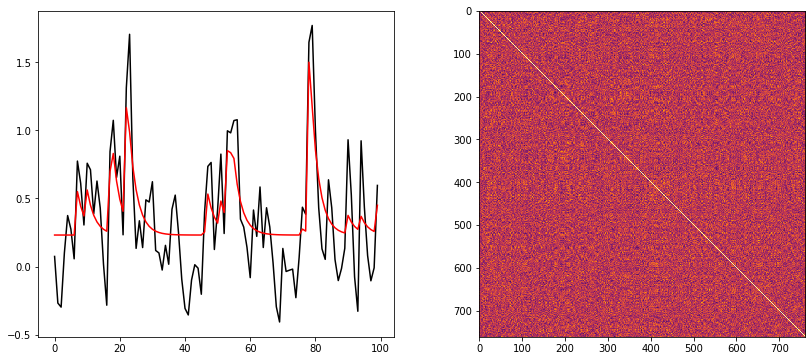

In [5]:
for k in np.sort(list(data.keys())):

        lfp = data[k]['LFP']
        lfp_times = data[k]['LFP_times']
        mature_ca = data[k]['mGC']
        ca_times  = data[k]['imaging_times']

        decon_mature_ca = []
        valid_idxs = []
        for (i,mca) in enumerate(mature_ca):
            try:
                c, s, b, g, lam = deconvolve(mca.reshape(-1,), penalty=1, b_nonneg=False)
                decon_mature_ca.append(c+b)
                valid_idxs.append(i)
            except:
                decon_mature_ca.append(np.zeros(len(mca),))
        decon_mature_ca = np.asarray(decon_mature_ca, dtype='float32')

        fig, ax = plt.subplots(1,2,figsize=(14,6))
        ax[0].plot(mature_ca[5][0:100], color='k')
        ax[0].plot(decon_mature_ca[5][0:100], color='r')
        ax[1].imshow(np.corrcoef(decon_mature_ca[valid_idxs,0:120]), cmap='inferno', vmin=-1., vmax=1.)
        plt.plot()

In [24]:
# attach ca on top of each other

decon_ca = {}
for k in np.sort(list(data.keys())):

    lfp = data[k]['LFP']
    lfp_times = data[k]['LFP_times']
    mature_ca = data[k]['mGC']
    ab_ca     = data[k]['abGC']
    combined_ca = np.concatenate((mature_ca, ab_ca))
    ca_times  = data[k]['imaging_times']

    nid = 0
    for (mid, mca) in enumerate(mature_ca):
        try:
            c, s, b, g, lam = deconvolve(mca.reshape(-1,), penalty=1, b_nonneg=False)
            if nid in decon_ca:
                trace = np.asarray(list(decon_ca[nid]['trace']) + list(c+b), dtype='float32')
                decon_ca[nid]['trace'] = trace
            else:
                decon_ca[nid] ={'trace': c+b, 'type': 'm'}
        except:
            decon_ca[nid] = None
            print(k, 'mature')
        nid += 1
        
    for aca in ab_ca:
        try:
            c, s, b, g, lam = deconvolve(aca.reshape(-1,), penalty=1, b_nonneg=False)
            if nid in decon_ca:
                trace = np.asarray(list(decon_ca[nid]['trace']) + list(c+b), dtype='float32')
                decon_ca[nid]['trace'] = trace
            else:
                decon_ca[nid] = {'trace': c+b, 'type': 'ab'}
        except:
            decon_ca[nid] = None
            print(k, 'ab')
        nid += 1
        
print(list(decon_ca.keys()))
        
            

/home/dhh/OASIS/oasis/functions.py:815: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[1:])[0]


0 mature
1 mature
2 mature
3 mature
4 mature
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,

In [25]:
valid_idxs = []
final_traces = []
ctypes = []
for nid in np.sort(list(decon_ca.keys())):
    if decon_ca[nid] is not None:
        valid_idxs.append(nid)
        final_traces.append(decon_ca[nid]['trace'])
        ctypes.append(decon_ca[nid]['type'])
final_traces = np.asarray(final_traces, dtype='float32')      
print(final_traces.shape)
del data
#np.savez('dg_204.npz', traces=final_traces, valid_idxs=valid_idxs, ctypes=ctypes)
        

(265, 13890)


(265, 13890)


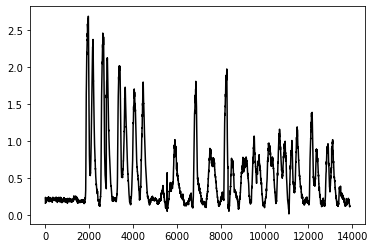

In [26]:
print(final_traces.shape)
plt.figure()
plt.plot(final_traces.mean(axis=0)[:], color='k')
plt.show()

(265, 13890)


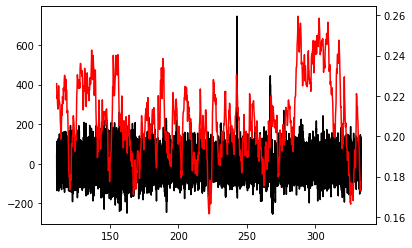

In [28]:
# dg201 - 1450, 3000; 3700,4800
# dg202 - 500, 1500; 
# dg204 - 0, 1000; 1000,2000

ca_FPS  = 4.5
lfp_FPS = 2000.
print(final_traces.shape)
ca_start, ca_stop = 500, 1500
ca_start_time, ca_stop_time = ca_start/ca_FPS, ca_stop/ca_FPS
lfp_start, lfp_stop = int(ca_start_time*lfp_FPS), int(ca_stop_time*lfp_FPS) 


fig, ax = plt.subplots()
try:
    ax.plot(np.arange(ca_start_time,ca_stop_time,1./lfp_FPS)[:],lfp_all[lfp_start:lfp_stop], color='k')
except:
    ax.plot(np.arange(ca_start_time,ca_stop_time,1./lfp_FPS)[1:],lfp_all[lfp_start:lfp_stop], color='k')
ax2 = ax.twinx()
try:
    ax2.plot(np.arange(ca_start_time,ca_stop_time,1./ca_FPS)[:],np.mean(final_traces,axis=0)[ca_start:ca_stop], color='r')
except:
    ax2.plot(np.arange(ca_start_time,ca_stop_time,1./ca_FPS)[1:],np.mean(final_traces,axis=0)[ca_start:ca_stop], color='r')


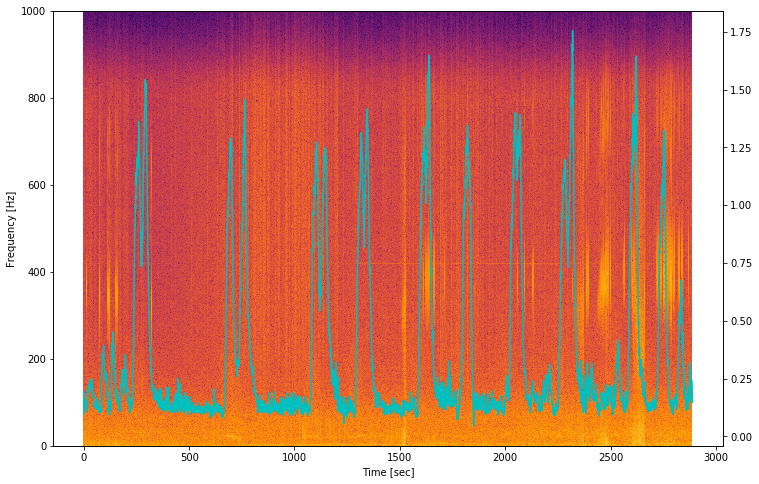

In [54]:
from scipy.signal import spectrogram, kaiser, kaiserord
from scipy.signal import butter, buttord, lfilter, filtfilt
from scipy.signal import freqs

lfp_chunk = lfp_all[lfp_start:lfp_stop]

f, t, Sxx = spectrogram(np.asarray(lfp_chunk), lfp_FPS, nperseg=4096)
fig, ax = plt.subplots(figsize=(12,8))
ax.pcolormesh(t, f, np.log10(Sxx), cmap='inferno')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax2 = ax.twinx()
ax2.plot(np.arange(ca_start_time,ca_stop_time,1./ca_FPS)[ca_start:ca_stop],np.mean(final_traces,axis=0)[ca_start:ca_stop], color='c')
plt.show()

